# Precision/Recall, F1 Score, Confusion Matrix

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#the following gives access to utils folder
#where utils package stores shared code
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(
                  os.getcwd(),
                  os.pardir)
)

#only add it once
if (PROJECT_ROOT not in sys.path):
    sys.path.append(PROJECT_ROOT)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Load credit Data, a very unbalanced dataset

In [85]:
df = pd.read_csv('creditcard_small.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,NaN,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.00,30
1,0.0,41505.0,0.801640,0.257049,0.157530,0.514663,0.009569,0.215434,-0.056494,0.311968,-0.050311,0.238691,1.513629,0.294285,-1.144582,0.628464,0.918866,-0.343708,0.106224,-0.330437,-0.220504,-0.227362,0.251326,0.786960,0.282392,-0.290991,-1.071519,0.350076,-0.040343,-0.152227,7.59,0
2,1.0,44260.0,-1.791619,-0.033219,1.889289,-1.897260,-0.662642,-0.401838,-0.245724,0.822692,0.374888,-1.299751,0.172562,0.037688,-1.459942,0.194549,-0.937490,1.366778,-0.912997,0.637652,-1.039040,0.075550,0.189991,0.161581,-0.171517,0.038012,0.370038,1.190435,0.016772,-0.041625,75.00,0
3,2.0,35483.0,1.286640,0.072917,0.212182,-0.269732,-0.283961,-0.663306,-0.016385,-0.120297,-0.135962,-0.049845,1.323074,1.191837,0.735631,0.310238,0.294935,0.471357,-0.673006,-0.146899,0.576073,-0.012090,-0.194829,-0.554362,0.052674,0.076792,0.209208,0.847617,-0.086559,-0.008262,0.00,0
4,3.0,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0


In [58]:
#save a subset for demo purposes
# len(df)
# #sample, then clean up index
# df=df.sample( frac=.01, replace=False, weights=None, random_state=42).reset_index(drop=True)
# print(f'there are {len(df)} rows in df')

# df.to_csv('creditcard_small.csv')

## Create a crummy model that always predicts 0

In [59]:
class Always0:
    def predict(ds):
        if ( not isinstance(ds,pd.DataFrame)):
            raise ValueError("ds must be a dataframe")
        return np.zeros(len(ds))

mod= Always0

In [68]:
#df[30] is type O, force it to int
df[30]=df[30].astype('int')

In [73]:
from sklearn.metrics import accuracy_score
res=Always0.predict(df.iloc[:,:])
base_score=accuracy_score(df[30], res)
print(f'Always0 is %{base_score*100} accurate!')

Always0 is %99.8244382022472 accurate!


## Lets see what precision and recall say

In [74]:
from sklearn.metrics import precision_score
precision = precision_score(df[30], res, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.000


/home/keith/anaconda3/envs/data301/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.metrics import recall_score
recall = recall_score(df[30], res, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.000


In [80]:
from sklearn.metrics import f1_score
f1 = f1_score(df[30], res, average='binary')
print('f1_score: %.3f' % f1)

f1_score: 0.000


## So it appears to be a pretty crappy classifier if we use anything other than accuracy

Credit score has so few frauds that it will be difficult to detect them

# Load breast cancer data
See <a href="https://github.com/wolfecameron/MachineLearning/blob/master/breast_cancer_classification.py">Breast Cancer Diagnosis</a> for original source

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data, target = load_breast_cancer(return_X_y=True)

target = pd.DataFrame(classif)
df = pd.DataFrame(data)

In [101]:
#any nulls?
df.isnull().sum().sum()

0

In [102]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Any correlations?

In [114]:
# fig, ax = plt.subplots(figsize=(15, 15))
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[2, 3, 12, 13, 20, 22, 23]

In [115]:
#yep dump em
df=df.drop(columns=to_drop)

## Create a classifier

In [116]:
# instantiate the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( oob_score=True, n_jobs=-1)

## split the data set into training and testing data

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target)

## Fit it

In [121]:
# fit the model to the data and find the baseline accuracy
rf.fit(x_train, y_train.squeeze())
accuracy = rf.oob_score_
accuracy

RandomForestClassifier(n_jobs=-1, oob_score=True)

0.9530516431924883

## Lets look in on Precision and recall

In [125]:
from sklearn.metrics import classification_report
res = rf.predict(x_test)
prec_rec = classification_report(res, y_test)
print (prec_rec)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.98      1.00      0.99        83

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



## And finaly the confusion matrix

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, res)

array([[58,  0],
       [ 2, 83]])

In [131]:
y_test.value_counts()

1    85
0    58
dtype: int64

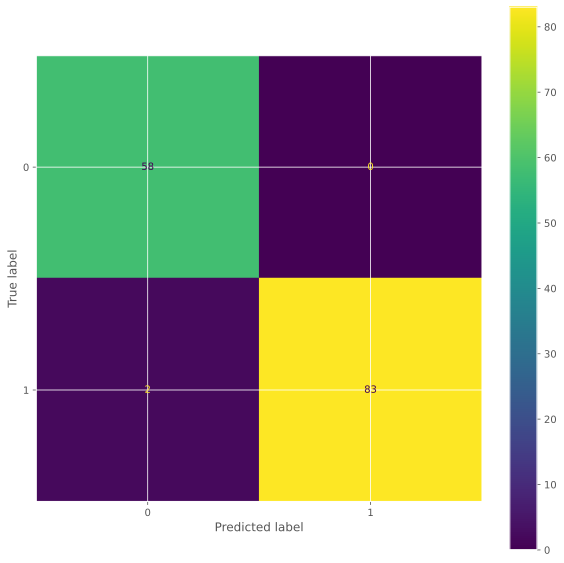

In [143]:
# Thats a little lean in terms of content
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, res, labels=[0,1])
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1]).plot(ax=ax)

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix1).plot()
plt.show()